# Chapter 4: Fundamentals of machine learning
- Banches of ML
- Glossary of ML
- Evaluation protocols
- Data pre-processing 
- Features Engineering (Quick idea)
- Overfitting and Underfitting
- 7 Step ML workflow

# The Four Branches of ML
## ___Supervised Learning___

Although supervised learning mostly consists of __classification__ and __regression__, there
are more exotic variants as well, including the following (with examples):

- _Sequence generation (seq2seq)_—Given a picture, predict a caption describing it. Sequence
generation can sometimes be reformulated as a series of classification problems
(such as repeatedly predicting a word or token in a sequence).

- _Syntax tree prediction_—Given a sentence, predict its decomposition into a syntax
tree.

-  _Object detection_—Given a picture, draw a bounding box around certain objects
inside the picture. This can also be expressed as a classification problem (given
many candidate bounding boxes, classify the contents of each one) or as a joint
classification and regression problem, where the bounding-box coordinates are
predicted via vector regression.

- _Image segmentation_—Given a picture, draw a pixel-level mask on a specific object.



## _Unspervised Learning_
__Dimensionality reduction__ and __clustering__ are well-known
categories of unsupervised learning.

This branch of machine learning consists of finding interesting transformations of the
input data without the help of any targets, for the purposes of data visualization, data
compression, or data denoising, or to better understand the correlations present in
the data at hand. Unsupervised learning is the bread and butter of data analytics, and
it’s often a necessary step in better understanding a dataset before attempting to solve
a supervised-learning problem. 
## _Self Supervised Learning_
Self-supervised learning is supervised learning without human-annotated labels—you can think of it as supervised learning without any humans in the loop. There are still labels involved (because the learning has to be
supervised by something), but they’re generated from the input data, typically using a
heuristic algorithm.

- For instance, __autoencoders__ are a well-known instance of self-supervised learning,
where the generated targets are the input, unmodified. 

- In the same way, trying to predict
the next frame in a video, given past frames, or the next word in a text, given previous
words, are instances of self-supervised learning (__temporally supervised learning__, in this
case: supervision comes from future input data). 

Note that the distinction between supervised, self-supervised, and unsupervised learning can be blurry sometimes—these
categories are more of a continuum without solid borders. 

Self-supervised learning can
be reinterpreted as either supervised or unsupervised learning, depending on whether
you pay attention to the learning mechanism or to the context of its application.

## _Reinforcement Learning_
In reinforcement learning,
an __agent__ receives information about its environment and learns to choose actions that
will maximize some __reward__. For instance, a neural network that “looks” at a videogame
screen and outputs game actions in order to maximize its score can be trained
via reinforcement learning.

Examples: DeepMind Atari and AlphaGo
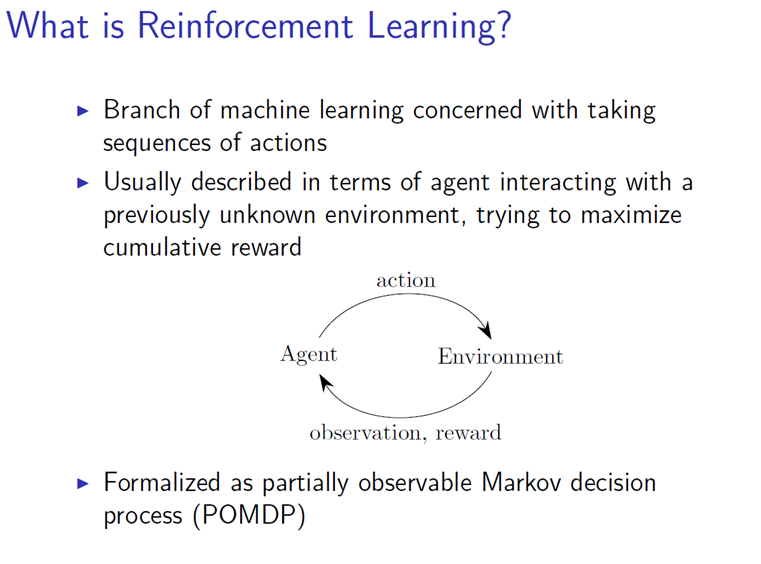
Currently, reinforcement learning is mostly a research area and hasn’t yet had significant
practical successes beyond games. In time, however, we expect to see reinforcement
learning take over an increasingly large range of real-world applications:
self-driving cars, robotics, resource management, education, and so on. It’s an idea
whose time has come, or will come soon.


# ML Glossary:
- __Sample or input__—One data point that goes into your model.
- __Prediction or output__—What comes out of your model.
- __Target__—The truth. What your model should ideally have predicted, according
to an external source of data.

Prediction error or loss value—A measure of the distance between your
model’s prediction and the target.
- __Classes__—A set of possible labels to choose from in a classification problem.
For example, when classifying cat and dog pictures, “dog” and “cat” are the
two classes.
- __Label__—A specific instance of a class annotation in a classification problem.
For instance, if picture #1234 is annotated as containing the class “dog,”
then “dog” is a label of picture #1234.
- __Ground-truth or annotations__—All targets for a dataset, typically collected by
humans.
- __Binary classification__—A classification task where each input sample should
be categorized into two exclusive categories.
- __Multiclass classification__—A classification task where each input sample
should be categorized into more than two categories: for instance, classifying
handwritten digits.
- __Multilabel classification__—A classification task where each input sample can
be assigned multiple labels. For instance, a given image may contain both a
cat and a dog and should be annotated both with the “cat” label and the
“dog” label. The number of labels per image is usually variable.
- __Scalar regression__—A task where the target is a continuous scalar value. Predicting
house prices is a good example: the different target prices form a continuous
space.
- __Vector regression__—A task where the target is a set of continuous values: for
example, a continuous vector. If you’re doing regression against multiple values
(such as the coordinates of a bounding box in an image), then you’re
doing vector regression.
- __Mini-batch or batch__—A small set of samples (typically between 8 and 128)
that are processed simultaneously by the model. The number of samples is
often a power of 2, to facilitate memory allocation on GPU. When training, a
mini-batch is used to compute a single gradient-descent update applied to
the weights of the model.

# Evaluation protocols of ML:
we split the data into a __training set__, a __validation set__, and a __test set__.

You train on the training data and evaluate your model
on the validation data. Once your model is ready for prime time, you test it one final
time on the test data.


The reason not to evaluate the models on the same data
they were trained on quickly became evident: after just a few epochs, all three models
began to __overfit__. That is, their performance on never-before-seen data started stalling
(or worsening) compared to their performance on the training data—which always
improves as training progresses.

In machine learning, the goal is to achieve models that __generalize__—that perform
well on never-before-seen data—and overfitting is the central obstacle.

## Why validation set?
You may ask, why not have two sets: a training set and a test set? You’d train on the
training data and evaluate on the test data. Much simpler!
The reason is that developing a model always involves tuning its configuration: for
example, choosing the number of layers or the size of the layers (called the __hyperparameters__
of the model, to distinguish them from the __parameters__, which are the network’s
_weights_). You do this tuning by using as a feedback signal the performance of
the model on the validation data.



### Information leaks to validation set
In essence, this tuning is a form of _learning_: a search
for a good configuration in some parameter space. As a result, tuning the configuration
of the model based on its performance on the validation set can quickly result in
overfitting to the validation set, even though your model is never directly trained on it.

Central to this phenomenon is the notion of _information leaks_. Every time you tune
a hyperparameter of your model based on the model’s performance on the validation
set, some information about the validation data leaks into the model. If you do this
only once, for one parameter, then very few bits of information will leak, and your validation
set will remain reliable to evaluate the model. But if you repeat this many
times—running one experiment, evaluating on the validation set, and modifying your
model as a result—then you’ll leak an increasingly significant amount of information
about the validation set into the model.
At the end of the day, you’ll end up with a model that performs artificially well on
the validation data, because that’s what you optimized it for. 

_You care about performance on completely new data, not the validation data, so you need to use a completely
different, never-before-seen dataset to evaluate the model: the test dataset._

_Your model shouldn’t have had access to any information about the test set, even indirectly._

## How to split the data into train, val and test?
Splitting your data into training, validation, and test sets may seem straightforward,
but there are a few advanced ways to do it that can come in handy when little data is
available. Let’s review three classic evaluation recipes: simple hold-out validation, Kfold
validation, and iterated K-fold validation with shuffling.

### SIMPLE HOLD-OUT VALIDATION

Set apart some fraction of your data as your test set. Train on the remaining data, and
evaluate on the test set. As you saw in the previous sections, in order to prevent information
leaks, you shouldn’t tune your model based on the test set, and therefore you
should also reserve a validation set.

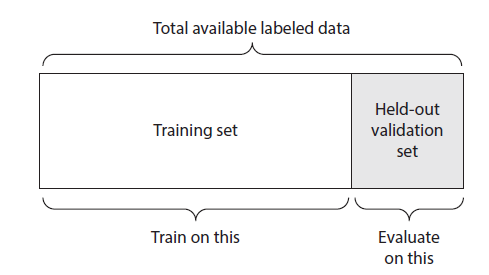

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is
available, then your validation and test sets may contain too few samples to be statistically
representative of the data at hand.

__Few samples is a relative term. So how to know ?__ This is easy to recognize: if different random
shuffling rounds of the data before splitting end up yielding very different measures
of model performance, then you’re having this issue. 

In [ ]:
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
model = get_model()
model.train(np.concatenate([training_data,
validation_data]))
test_score = model.evaluate(test_data)

### K-FOLD VALIDATION

With this approach, you split your data into K partitions of equal size. For each partition
i, train a model on the remaining K – 1 partitions, and evaluate it on partition i.
Your final score is then the averages of the K scores obtained. This method is helpful
when the performance of your model shows significant variance based on your traintest
split. Like hold-out validation, this method doesn’t exempt you from using a distinct
validation set for model calibration.

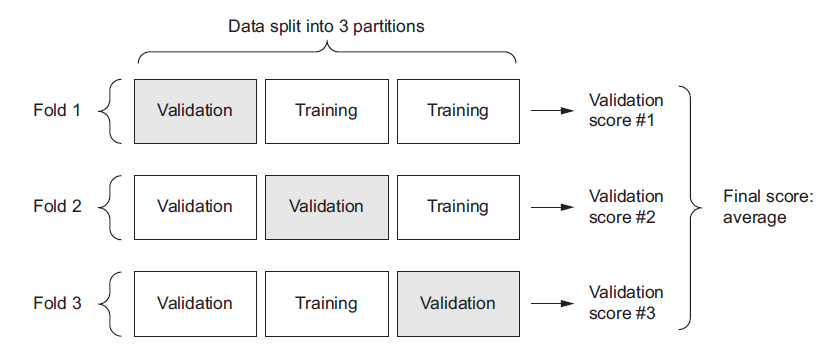

In [ ]:
k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
    num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
    data[num_validation_samples * (fold + 1):]
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

__When to tune the model__:

1- After each fold training: fast conversion, high oscillation. Not preferred unless you have very very little data.

2- After all folds training: slow conversion, stable. This is preferred.


### ITERATED K-FOLD VALIDATION WITH SHUFFLING 

This one is for situations in which you have relatively little data available and you need
to evaluate your model as precisely as possible. It consists of applying K-fold validation multiple times, shuffling
the data every time before splitting it K ways. The final score is the average of the
scores obtained at each run of K-fold validation. Note that you end up training and
evaluating P × K models (where P is the number of iterations you use), which can very
expensive.

## Things to keep in mind

Keep an eye out for the following when you’re choosing an evaluation protocol:
-  ___Data representativeness___—You want both your training set and test set to be representative
of the data at hand. For instance, if you’re trying to classify images of
digits, and you’re starting from an array of samples where the samples are
ordered by their class, taking the first 80% of the array as your training set and
the remaining 20% as your test set will result in your training set containing
only classes 0–7, whereas your test set contains only classes 8–9. This seems like
a ridiculous mistake, but it’s surprisingly common. For this reason, you usually
should randomly shuffle your data before splitting it into training and test sets.
- ___The arrow of time___—If you’re trying to predict the future given the past (for example,
tomorrow’s weather, stock movements, and so on), you should not randomly
shuffle your data before splitting it, because doing so will create a
temporal leak: your model will effectively be trained on data from the future. In
such situations, you should always make sure all data in your test set is posterior
to the data in the training set.
- ___Redundancy___ in your data—If some data points in your data appear twice (fairly
common with real-world data), then shuffling the data and splitting it into a
training set and a validation set will result in redundancy between the training
and validation sets. In effect, you’ll be testing on part of your training data,
which is the worst thing you can do! Make sure your training set and validation
set are disjoint.

# Data preprocessing for neural networks

In general, the data pipeline includes:
1. _Loading data_: This includes reading the data files, exploring and visualizing the samples, exploring the labels distribution, ...etc
2. _Preprocessing_: This This includes vectorization, normalization, handling missing values, and feature extraction (mostly ML). 

## Vectorization (Binarization)
All inputs and targets in a neural network must be tensors of floating-point data (or, in
specific cases, tensors of integers). Whatever data you need to process—sound,
images, text—you must first turn into tensors, a step called ___data vectorization___. For
instance, in the two previous text-classification examples, we started from text represented
as lists of integers (standing for sequences of words), and we used one-hot
encoding to turn them into a tensor of float32 data. In the examples of classifying
digits and predicting house prices, the data already came in vectorized form, so you
were able to skip this step.

## Normalization
In general, it isn’t safe to feed into a neural network data that takes relatively large values
(for example, multidigit integers, which are much larger than the initial values taken
by the weights of a network) or data that is heterogeneous (for example, data where one
feature is in the range 0–1 and another is in the range 100–200). Doing so can trigger
large gradient updates that will prevent the network from converging.

To make learning easier for your network, your data should have the following characteristics:

__Take small values: Same Range__
Typically, most values should be in the 0–1 range.

In the digit-classification example, you started from image data encoded as integers in
the 0–255 range, encoding grayscale values. Before you fed this data into your network,
you had to cast it to float32 and divide by 255 so you’d end up with floatingpoint
values in the 0–1 range. 

__Homogeneous: Same scale__
That is, all features should take values in roughly the same
range.

Similarly, when predicting house prices, you started
from features that took a variety of ranges—some features had small floating-point values,
others had fairly large integer values. 

__Z-Normalization__
Before you fed this data into your network, you had to normalize each feature independently so that it had a standard deviation
of 1 and a mean of 0.

The following stricter normalization practice is common and can help,
although it isn’t always necessary (for example, you didn’t do this in the digit-classification
example, _because all the values where homogenous, so only scaling was enough_):
-  Normalize each feature independently to have a mean of 0.
-  Normalize each feature independently to have a standard deviation of 1.



In [ ]:
x -= x.mean(axis=0)
x /= x.std(axis=0)

## Handling missing data
You may sometimes have missing values in your data. For instance, in the house-price example, the first feature (the column of index 0 in the data) was the per capita crime rate. What if this feature wasn’t available for all samples? You’d then have missing values in the training or test data.

__Handle missing data as 0's__

In general, with neural networks, it’s safe to input missing values as 0, with the condition
that 0 isn’t already a meaningful value. The network will learn from exposure to
the data that the value 0 means missing data and will start ignoring the value.

__Artificial missing data: Data augmentation__

Note that if you’re expecting missing values in the test data, but the network was
trained on data without any missing values, the network won’t have learned to ignore
missing values! In this situation, you should artificially generate training samples with
missing entries: copy some training samples several times, and drop some of the features
that you expect are likely to be missing in the test data.




## Features engineering (mostly ML)

Feature engineering is the process of using your own knowledge about the data and about the machine-learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying ___hardcoded (nonlearned) transformations___ to the data before it goes into the model.
## The power of representation
We have two categories (blue/green) which we want to cluster/separate/classify
So separating the two classes in this case is much easier just by using polar representation

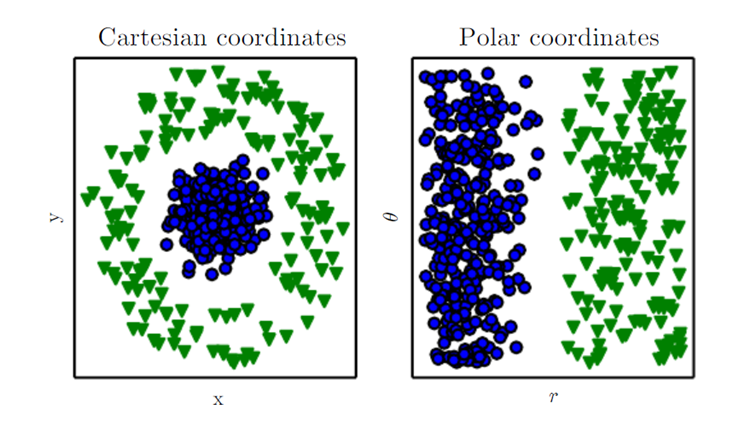

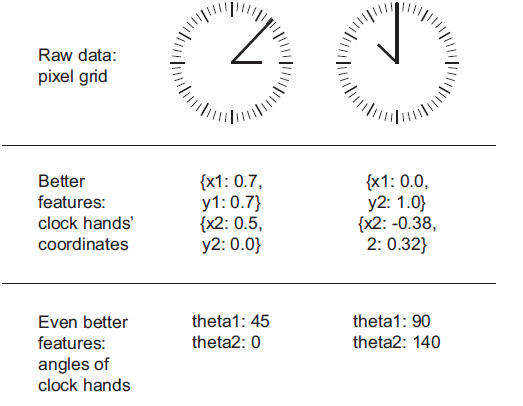

Although it is possible to learn the time from pixels using ConvNets, but it's computationally expensive as well. If you can represent the time in better way, like positions of hands, or even better, the angles, then the problem is much easier for a network, or even a simple classifier.

## Before Deep Learning
Before deep learning, feature engineering used to be critical, ___because classical
shallow algorithms didn’t have hypothesis spaces rich enough to learn useful features
by themselves___. 

The way you presented the data to the algorithm was essential to its success.
For instance, before convolutional neural networks became successful on the
MNIST digit-classification problem, solutions were typically based on hardcoded features
such as the number of loops in a digit image, the height of each digit in an
image, a histogram of pixel values, and so on.

## Deep Learning for rescue
Fortunately, modern deep learning removes the need for most feature engineering,
because neural networks are capable of automatically extracting useful features
from raw data. 

## Does this mean you don’t have to worry about feature engineering as long as you’re using deep neural networks?

_No, for two reasons:_

- Good features still allow you to solve problems more elegantly while using ___fewer resources___. For instance, it would be ridiculous to solve the problem of reading a
clock face using a convolutional neural network.

- Good features let you solve a problem with ___far less data___. The ability of deeplearning
models to learn features on their own relies on having lots of training data available; if you have only a few samples, then the information value in their features becomes critical.

# Overfitting and underfitting

The fundamental issue in machine learning is the tension between _optimization and generalization_.
_Optimization_ refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning),

Whereas _generalization_ refers to how well the trained model performs on data it has
never seen before. 

_The goal of the game is to get good generalization, of course, but
you don’t control generalization; you can only adjust the model based on its training
data._


__Your first problem is underfitting__
At the beginning of training, optimization and generalization are correlated: the
lower the loss on training data, the lower the loss on test data. While this is happening,
your model is said to be __underfit__: there is still progress to be made; the network hasn’t
yet modeled all relevant patterns in the training data. 

But after a certain number of iterations on the training data, generalization stops improving, and validation metrics
stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

__What if you do not overfit even the training data?__
Then you have a fundamental issue. The only solution is to use a bigger network to give more capactiy to represent the data.
That's why we always start with a big model, and then treat overfitting:

Copied from fast.ai course
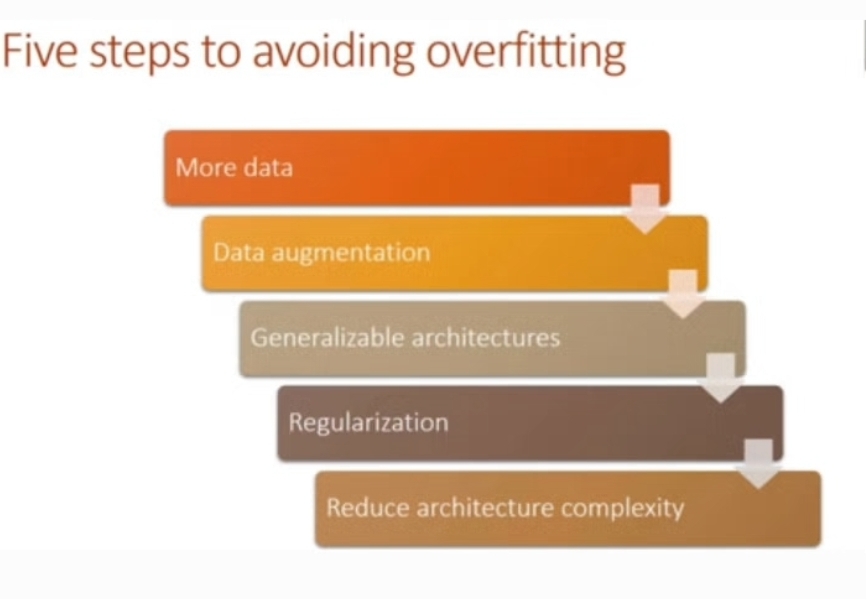

As you can see, the last resort is the reduce the network size, we have several things to try first:
- _Increasing the data_ is the best solution, but not always possible
- _Data augmnentation_ is a form of _smartly_ or _artificially_ increasing the data, by applying reasonable transfromations to the already labeled data we have. 
- _Generalizable architecture_ is an advanced topic related to transfer learning, where we start from pre-trained model.
- _Regularization_ The processing of fighting overfitting in this way is called _regularization_. There are many techniques. L2 Regularization adds a penality on the growth of the network capacity, _Dropout_ also is a good cure, where we stop some weights from learning occasionally.
- _Reduce model complexity_ by using smaller model.


### Let's apply to the movie classification example:

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Start with a big model

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:

As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

## Adding weight regularization




A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer 
parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity 
of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called 
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This 
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the 
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called 
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different 
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight 
regularization to our movie review classification network:

__Note__ here we follow the normal flow, as we start from the big model, and not the small one.

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of 
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training 
than at test time.

Here's the impact of our L2 regularization penalty:

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

__Try yourself__
As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [ ]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout


Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his 
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of 
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a 
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5, 
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test 
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to 
balance for the fact that more units are active than at training time.

Consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we would be 
zero-ing out at random a fraction of the values in the matrix:

__Remember__ randint is sampling a discreter uniform distribution. For low=0, high=2, then it generates 0 or 1, each with uniform prob = 50%.

In [ ]:
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)


At test time, we would be scaling the output down by the dropout rate. Here we scale by 0.5 (because we were previous dropping half the 
units):



In [ ]:
# At test time:
layer_output *= 0.5


Note that this process can be implemented by doing both operations at training time and leaving the output unchanged at test time, which is 
often the way it is implemented in practice:

In [ ]:
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

__In keras it's as simple as__:

In [ ]:
model.add(layers.Dropout(0.5))

__Now let's apply to movie review__

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Putting it all together: The universal ML workflow
___Seven steps:___

## 1. Defining the problem and assembling a dataset

A. Assemble raw data

B. Define the type of problem: classification, multi-label, multi-class, regression,....etc

C. Label data 


Be aware of the hypotheses you make at this stage:
- You hypothesize that your outputs can be predicted given your inputs.
- You hypothesize that your available data is sufficiently informative to learn the relationship between inputs and outputs.

Until you have a working model, these are merely hypotheses, waiting to be validated
or invalidated.

Not all problems can be solved; just because you’ve assembled examples
of inputs X and targets Y doesn’t mean X contains enough information to predict
Y. For instance, if you’re trying to predict the movements of a stock on the stock market
given its recent price history, you’re unlikely to succeed, because price history
doesn’t contain much predictive information.

One class of unsolvable problems you should be aware of is ___nonstationary problems___.
Suppose you’re trying to build a recommendation engine for clothing, you’re training
it on one month of data (August), and you want to start generating recommendations
in the winter. One big issue is that the kinds of clothes people buy change from season
to season: clothes buying is a nonstationary phenomenon over the scale of a few
months. What you’re trying to model changes over time. In this case, the right move is
to constantly retrain your model on data from the recent past, or gather data at a
timescale where the problem is stationary. For a cyclical problem like clothes buying, a
few years’ worth of data will suffice to capture seasonal variation—but remember to
make the time of the year an input of your model!

Keep in mind that machine learning can only be used to memorize patterns that
are present in your training data. __You can only recognize what you’ve seen before.
Using machine learning trained on past data to predict the future is making the
assumption that the future will behave like the past. That often isn’t the case.__

## 2. Choosing a measure of success
__To control something, you need to be able to observe it.__

To achieve success, you must define what you mean by success—accuracy? Precision and recall? Customer-retention
rate? 

__A Metric must align with loss__
Your metric for success will guide the choice of a loss function: what your model
will optimize. It should directly align with your higher-level goals, such as the success
of your business.

__Common metrics__
For _balanced-classification problems_, where every class is equally likely, accuracy and
area under the receiver operating characteristic curve (ROC AUC) are common metrics. 

For _class-imbalanced problems_, you can use precision and recall. For ranking problems or
multilabel classification, you can use mean average precision. 

And it isn’t uncommon to have to define your own custom metric by which to measure success. To get a sense
of the diversity of machine-learning success metrics and how they relate to different
problem domains, it’s helpful to browse the data science competitions on Kaggle
(https://kaggle.com); they showcase a wide range of problems and evaluation metrics.


# 3. Deciding on an evaluation protocol

Once you know what you’re aiming for, you must establish how you’ll measure your
current progress. We’ve previously reviewed three common evaluation protocols:

- Maintaining a hold-out validation set—The way to go when you have plenty of
data

- Doing K-fold cross-validation—The right choice when you have too few samples
for hold-out validation to be reliable

- Doing iterated K-fold validation—For performing highly accurate model evaluation
when little data is available

Just pick one of these. In most cases, the first will work well enough.

# 4. Preparing your data

- As you saw previously, your data should be formatted as tensors.

- The values taken by these tensors should usually be scaled to small values: for example, in the [-1, 1] range or [0, 1] range.

- If different features take values in different ranges (heterogeneous data), then the data should be normalized.

- You may want to do some feature engineering, especially for small-data problems.


# 5. Developing a model that does better than a baseline
Your goal at this stage is to achieve ___statistical power___ (1/num_classes) : that is, to develop a small model
that is capable of beating a dumb baseline. In the MNIST digit-classification example,
anything that achieves an accuracy greater than 0.1 can be said to have statistical
power; in the IMDB example, it’s anything with an accuracy greater than 0.5.

Note that it’s not always possible to achieve statistical power. If you can’t beat a random
baseline after trying multiple reasonable architectures, it may be that the answer
to the question you’re asking isn’t present in the input data. Remember that you make
two hypotheses:
- You hypothesize that your outputs can be predicted given your inputs.
- You hypothesize that the available data is sufficiently informative to learn the
relationship between inputs and outputs.


It may well be that these hypotheses are false, in which case you must go back to the
drawing board.


Assuming that things go well, you need to make three key choices to build your
first working model:
- _Last-layer activation_—This establishes useful constraints on the network’s output.
For instance, the IMDB classification example used sigmoid in the last
layer; the regression example didn’t use any last-layer activation; and so on.

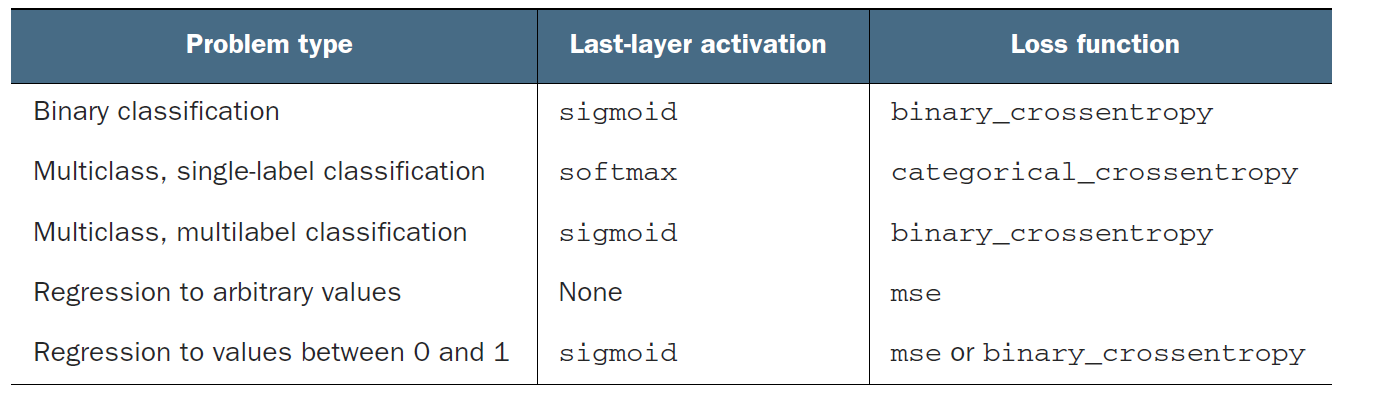
- _Loss function_—This should match the type of problem you’re trying to solve. For
instance, the IMDB example used binary_crossentropy, the regression example
used mse, and so on.

__Metrics are not always possible to optimize for__
Regarding the choice of a loss function, note that it isn’t always possible to directly
optimize for the metric that measures success on a problem. Sometimes there is no
easy way to turn a metric into a loss function; loss functions, after all, need to be computable
given only a mini-batch of data (ideally, a loss function should be computable
for as little as a single data point) and must be differentiable (otherwise, you can’t use
backpropagation to train your network). For instance, the widely used classification
metric ROC AUC can’t be directly optimized. Hence, in classification tasks, it’s common
to optimize for a proxy metric of ROC AUC, such as crossentropy. In general, you
can hope that the lower the crossentropy gets, the higher the ROC AUC will be.


- _Optimization configuration_—What optimizer will you use? What will its learning
rate be? In most cases, it’s safe to go with rmsprop or adam and their default learning rate.



# 6. Scaling up: developing a model that overfits
Once you’ve obtained a model that has statistical power, the question becomes, is your model sufficiently powerful?
Does it have enough layers and parameters to properly model the problem at hand? 

For instance, a network with a single hidden layer with
two units would have statistical power on MNIST but wouldn’t be sufficient to solve the
problem well. 

Remember that the universal tension in machine learning is between
optimization and generalization; the ideal model is one that stands right at the border
between underfitting and overfitting; between undercapacity and overcapacity. 

___To figure out where this border lies, first you must cross it.___

_To figure out how big a model you’ll need, you must develop a model that overfits._

This is fairly easy:
1. Add layers.

2. Make the layers bigger.

3. Train for more epochs.

Always monitor the training loss and validation loss, as well as the training and validation
values for any metrics you care about. When you see that the model’s performance
on the validation data begins to degrade, you’ve achieved overfitting.

__The next stage is to start regularizing and tuning the model, to get as close as possible
to the ideal model that neither underfits nor overfits.__

# 7. Regularizing your model and tuning your hyperparameters
This step will take the most time: you’ll repeatedly modify your model, train it, evaluate
on your validation data (not the test data, at this point), modify it again, and
repeat, until the model is as good as it can get. These are some things you should try:

- Try to increase data (not always possible).
- Try data augmentation (advanced).
- Try transfer learning (advanced). 
- Add dropout.
- Add L1 and/or L2 regularization.
- Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
- Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.
- Try different architectures: add or remove layers.